In [568]:
# 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [570]:
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [571]:
Datos.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [573]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificaciòn de datos faltantes y atìpicos')

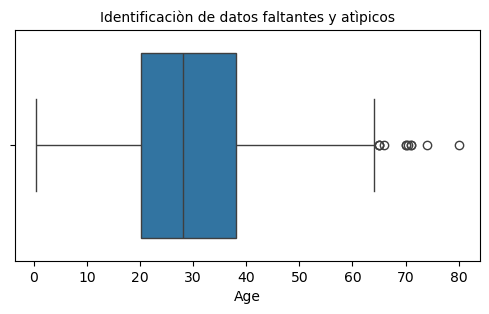

In [576]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificaciòn de datos faltantes y atìpicos', fontsize=10)            

In [578]:
# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
print("Cantidad de registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de registros con cero en PassengerId:  0
Cantidad de registros con cero en Pclass:  0
Cantidad de registros con cero en Age:  0
Cantidad de registros con cero en Fare:  15


In [580]:
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [582]:
print("Cantidad de registros con cero en PassengerId: ",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero en Pclass: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en Fare: ",Datos['Fare'].isin([0]).sum())

Cantidad de registros con cero en PassengerId:  0
Cantidad de registros con cero en Pclass:  0
Cantidad de registros con cero en Age:  0
Cantidad de registros con cero en Fare:  0


Text(0.5, 1.0, 'Identificaciòn de datos atìpicos')

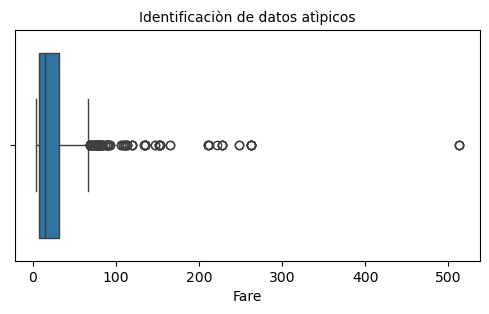

In [584]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificaciòn de datos atìpicos', fontsize=10)

In [586]:
nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print ("El total de datos atìpicos es {}".format(Total_Atipicos))

El total de datos atìpicos es 500


In [588]:
Datos=Datos[(Datos['Fare']<nivel_maximo)&(Datos['Fare']>nivel_minimo)]

In [590]:
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print ("El total de datos atìpicos es {}".format(Total_Atipicos))

El total de datos atìpicos es 0


In [592]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  391 non-null    int64  
 1   Survived     391 non-null    int64  
 2   Pclass       391 non-null    int64  
 3   Name         391 non-null    object 
 4   Sex          391 non-null    object 
 5   Age          330 non-null    float64
 6   SibSp        391 non-null    int64  
 7   Parch        391 non-null    int64  
 8   Ticket       391 non-null    object 
 9   Fare         391 non-null    float64
 10  Cabin        181 non-null    object 
 11  Embarked     389 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.7+ KB


In [594]:
# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
Datos['Survived'].value_counts()

Survived
1    200
0    191
Name: count, dtype: int64

In [596]:
Datos[['Survived']].head(60)

,Survived
1,1
3,1
6,0
7,0
9,1
11,1
13,0
16,0
20,0
23,1


In [598]:
# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)


In [600]:
print (X_train)

     PassengerId  Pclass                                    Name     Sex  \
634          635       3                      Skoog, Miss. Mabel  female   
533          534       3  Peter, Mrs. Catherine (Catherine Rizk)  female   
493          494       1                 Artagaveytia, Mr. Ramon    male   
449          450       1          Peuchen, Major. Arthur Godfrey    male   
848          849       2                       Harper, Rev. John    male   
..           ...     ...                                     ...     ...   
177          178       1              Isham, Miss. Ann Elizabeth  female   
551          552       2             Sharp, Mr. Percival James R    male   
546          547       2       Beane, Mrs. Edward (Ethel Clarke)  female   
504          505       1                   Maioni, Miss. Roberta  female   
543          544       2                       Beane, Mr. Edward    male   

      Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
634   9.0      3      2    

In [602]:
print (Y_train)

634    0
533    1
493    0
449    1
848    0
      ..
177    0
551    0
546    1
504    1
543    1
Name: Survived, Length: 293, dtype: int64


In [604]:
print (Datos.head())


   PassengerId  Survived  Pclass  \
1            2         1       1   
3            4         1       1   
6            7         0       1   
7            8         0       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch    Ticket     Fare Cabin Embarked  
1      0  PC 17599  71.2833   C85        C  
3      0    113803  53.1000  C123        S  
6      0     17463  51.8625   E46        S  
7      1    349909  21.0750   NaN        S  
9      0    237736  30.0708   NaN        C  


In [668]:
Datos_numerico = Datos.select_dtypes(include=['number'])
print(Datos_numerico.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
1            2         1       1  38.0      1      0  71.2833
3            4         1       1  35.0      1      0  53.1000
6            7         0       1  54.0      0      0  51.8625
7            8         0       3   2.0      3      1  21.0750
9           10         1       2  14.0      1      0  30.0708


In [774]:
# 5.Entrenar el modelo configurando los diferentes hiperparámetros.
Datos_filtrado = Datos.drop(columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'])

In [776]:

# Volvemos a dividir el dataset en Train y Test para evaluar correctamente el modelo, ya con Datos_Filtrado
X = Datos_filtrado.drop('Survived',axis=1)
Y = Datos_filtrado['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)

In [778]:
Datos_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 1 to 889
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  391 non-null    int64  
 1   Survived     391 non-null    int64  
 2   Pclass       391 non-null    int64  
 3   SibSp        391 non-null    int64  
 4   Parch        391 non-null    int64  
 5   Fare         391 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 21.4 KB


In [780]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

Prediccion = modelo_regresion.predict(X_test)


In [782]:
print (Y_test)

291    1
35     0
435    1
787    0
257    1
      ..
452    0
820    1
849    1
218    1
224    1
Name: Survived, Length: 98, dtype: int64


In [784]:
print (Prediccion)

[1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1]


In [786]:
#6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        48
           1       0.63      0.76      0.69        50

    accuracy                           0.65        98
   macro avg       0.66      0.65      0.65        98
weighted avg       0.66      0.65      0.65        98



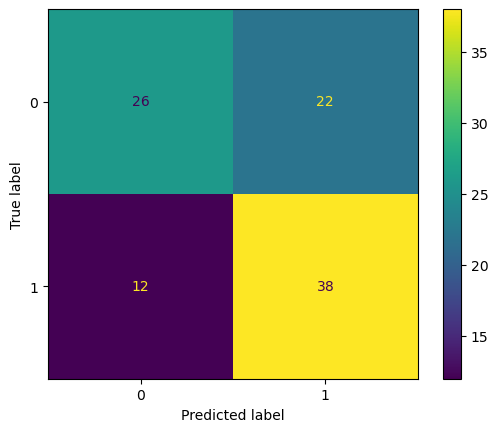

In [788]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

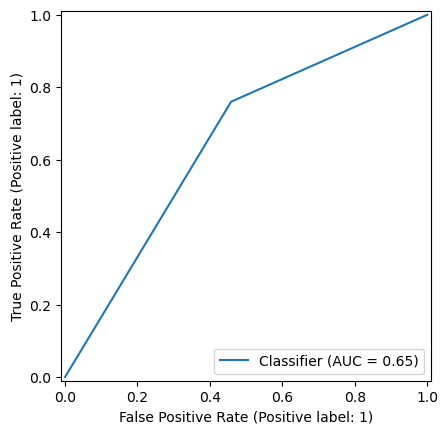

In [790]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()